In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-house-prices/housing.csv


### SGD Implementation Reference:
https://towardsdatascience.com/implementing-sgd-from-scratch-d425db18a72c

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
import matplotlib

### Data

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. 

LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

We can see that the input attributes have a mixture of units.

In [3]:
path = '/kaggle/input/boston-house-prices/housing.csv'
header_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
              'DIS', 'RAD', 'TAX', 'PTRATION', 'B', 'LSTAT', 'PRICE']
df = pd.read_csv(path, names=header_names, delim_whitespace=True)
df.shape

(506, 14)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
x = df.loc[:, 'ZN':'LSTAT']
y = df.loc[:, 'PRICE']
x.shape, y.shape

((506, 12), (506,))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [8]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()
X_train = pd.DataFrame(scalar.fit_transform(X_train), columns=header_names[1:-1], index=X_train.index)
X_test = pd.DataFrame(scalar.transform(X_test), columns=header_names[1:-1], index=X_test.index)

In [9]:
X_train

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT
141,-0.499979,1.548016,-0.263603,0.588213,-1.839367,1.107402,-1.125110,-0.618160,0.206735,1.227257,0.424543,3.108073
272,0.346774,-0.589747,-0.263603,-0.797821,0.327487,-0.367661,0.075090,-0.733637,-1.049493,0.056963,0.401853,-0.666430
135,-0.499979,1.548016,-0.263603,0.588213,0.037907,1.043114,-0.799984,-0.618160,0.206735,1.227257,0.398461,0.639367
298,2.463658,-1.265584,-0.263603,-1.352235,0.052172,-1.746292,1.968937,-0.502683,-0.257013,-1.653466,0.089342,-1.056896
122,-0.499979,2.086394,-0.263603,0.215716,-0.495604,0.853820,-0.811511,-0.849114,-1.254951,0.282020,0.204545,0.776596
...,...,...,...,...,...,...,...,...,...,...,...,...
323,-0.499979,-0.529609,-0.263603,-0.546603,-0.856509,0.189506,0.464292,-0.502683,-0.673799,0.507076,0.357058,-0.099123
192,1.405216,-1.093761,-0.263603,-1.031715,1.240447,-1.524854,1.316070,-0.502683,-0.022204,-1.473421,0.349573,-1.353990
117,-0.499979,-0.153031,-0.263603,-0.078816,-0.410014,0.485947,-0.491616,-0.387206,0.177384,-0.303127,0.396590,-0.302844
47,-0.499979,-0.596907,-0.263603,-0.936425,-0.397176,0.589523,0.933261,-0.733637,-0.990791,-0.258116,0.375888,0.899677


In [10]:
X_train['price'] = y_train
X_test['price'] = y_test
X_train.shape, X_test.shape

((354, 13), (152, 13))

In [11]:
X_train

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,price
141,-0.499979,1.548016,-0.263603,0.588213,-1.839367,1.107402,-1.125110,-0.618160,0.206735,1.227257,0.424543,3.108073,14.4
272,0.346774,-0.589747,-0.263603,-0.797821,0.327487,-0.367661,0.075090,-0.733637,-1.049493,0.056963,0.401853,-0.666430,24.4
135,-0.499979,1.548016,-0.263603,0.588213,0.037907,1.043114,-0.799984,-0.618160,0.206735,1.227257,0.398461,0.639367,18.1
298,2.463658,-1.265584,-0.263603,-1.352235,0.052172,-1.746292,1.968937,-0.502683,-0.257013,-1.653466,0.089342,-1.056896,22.5
122,-0.499979,2.086394,-0.263603,0.215716,-0.495604,0.853820,-0.811511,-0.849114,-1.254951,0.282020,0.204545,0.776596,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,-0.499979,-0.529609,-0.263603,-0.546603,-0.856509,0.189506,0.464292,-0.502683,-0.673799,0.507076,0.357058,-0.099123,18.5
192,1.405216,-1.093761,-0.263603,-1.031715,1.240447,-1.524854,1.316070,-0.502683,-0.022204,-1.473421,0.349573,-1.353990,36.4
117,-0.499979,-0.153031,-0.263603,-0.078816,-0.410014,0.485947,-0.491616,-0.387206,0.177384,-0.303127,0.396590,-0.302844,19.2
47,-0.499979,-0.596907,-0.263603,-0.936425,-0.397176,0.589523,0.933261,-0.733637,-0.990791,-0.258116,0.375888,0.899677,16.6


### Stochastic Gradient Descent

In [12]:
from sklearn.metrics import mean_squared_error

def my_sgd(X_train, learning_rate=0.2, n_epochs=1000, sample_size=40):
    n_cols = X_train.shape[1]
    columns = X_train.columns.values
    w = np.random.randn(n_cols - 1)
    b = np.random.randn(1)
    
    for epoch in range(n_epochs):
        # Get Sample
        sample = X_train.sample(sample_size)
        x = sample.loc[:, columns[:-1]].values
        y = sample.loc[:, columns[-1]].values
        
        loss = 0
        
        y_pred = []
        sq_loss = []
        
        for i in range(sample_size):
            p = x[i]
            q = y[i]
            
            # calculate error
            pred = np.dot(x[i], w.T) + b
            error = y[i] - pred
            
            # changes
            lw = (-2 * x[i] * error) / sample_size
            lb = (-2 * error) / sample_size
            
            # update
            w = w - learning_rate * lw
            b = b - learning_rate * lb
            
            # predict new
            pred_new = np.dot(x[i], w.T)
            y_pred.append(pred_new)
        
        # loss
        loss = mean_squared_error(y_pred, y)
        
        # print
        print(f'epoch: {epoch}, loss: {loss:.03f}')
        
        # learning rate decay
        learning_rate /= 1.02
        
    return w, b

In [13]:
w, b = my_sgd(X_train)

epoch: 0, loss: 489.943
epoch: 1, loss: 476.868
epoch: 2, loss: 514.834
epoch: 3, loss: 549.291
epoch: 4, loss: 495.594
epoch: 5, loss: 537.144
epoch: 6, loss: 569.933
epoch: 7, loss: 536.538
epoch: 8, loss: 547.082
epoch: 9, loss: 587.639
epoch: 10, loss: 510.398
epoch: 11, loss: 506.588
epoch: 12, loss: 530.546
epoch: 13, loss: 492.073
epoch: 14, loss: 497.490
epoch: 15, loss: 500.173
epoch: 16, loss: 500.449
epoch: 17, loss: 491.315
epoch: 18, loss: 536.281
epoch: 19, loss: 567.339
epoch: 20, loss: 534.531
epoch: 21, loss: 531.253
epoch: 22, loss: 501.627
epoch: 23, loss: 544.919
epoch: 24, loss: 522.655
epoch: 25, loss: 494.441
epoch: 26, loss: 498.602
epoch: 27, loss: 503.797
epoch: 28, loss: 568.373
epoch: 29, loss: 559.466
epoch: 30, loss: 523.649
epoch: 31, loss: 523.578
epoch: 32, loss: 475.209
epoch: 33, loss: 532.430
epoch: 34, loss: 515.143
epoch: 35, loss: 557.132
epoch: 36, loss: 529.700
epoch: 37, loss: 589.944
epoch: 38, loss: 479.969
epoch: 39, loss: 529.715
epoch: 40,

In [14]:
def predict(X, w, b):
    y_pred = []
    y_actual = []
    columns = X.columns.values
    for i in range(len(X)):
        sample = X.loc[:, columns[:-1]].values
        sample_y = X.loc[:, columns[:-1]].values
        x = sample[i]
        pred = np.asscalar(np.dot(x, w.T) + b)
        y_pred.append(pred)
        
    return np.array(y_pred)

y_pred_test = predict(X_test, w, b)
y_pred_test

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  if __name__ == '__main__':


array([25.57723166, 23.28412281, 29.38101937, 12.93004013, 21.46838969,
       19.49533713, 19.60831973, 21.04120026, 18.87099847, 20.90997857,
       12.92067695, 17.26472552, 16.60356393,  5.74628537, 41.56553218,
       32.42116849, 21.63269889, 36.67062896, 31.15399675, 23.0005666 ,
       24.93189164, 24.4839901 , 20.61075596, 30.17630947, 22.10995357,
        9.32536324, 17.52786897, 18.73322773, 36.61819299, 20.53679559,
       17.75100227, 17.14382376, 19.06967961, 22.93209717, 28.68484274,
       18.90106057, 12.21674785, 24.61391468, 17.67161657, 14.4570406 ,
       26.1794954 , 20.5534816 , 22.68362066, 14.32391003, 23.68401659,
       25.02646911, 19.29585713, 23.97435623,  9.53000236, 24.78292969,
       22.97344325, 17.50274739, 23.72240454, 31.16338591, 13.98506694,
       21.14813544, 20.51460418, 15.44478682, 19.0233811 , 22.01158477,
       17.38925664, 21.62906574, 32.89292099, 31.31673915, 17.59218937,
       32.69627062, 18.15349018, 18.79875568, 19.76590025, 23.01

In [15]:
y_test_actual = X_test.loc[:, X_test.columns.values[-1]].values
y_test_actual

array([22.6, 50. , 23. ,  8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6,  8.8,
       17.2, 14.9, 10.5, 50. , 29. , 23. , 33.3, 29.4, 21. , 23.8, 19.1,
       20.4, 29.1, 19.3, 23.1, 19.6, 19.4, 38.7, 18.7, 14.6, 20. , 20.5,
       20.1, 23.6, 16.8,  5.6, 50. , 14.5, 13.3, 23.9, 20. , 19.8, 13.8,
       16.5, 21.6, 20.3, 17. , 11.8, 27.5, 15.6, 23.1, 24.3, 42.8, 15.6,
       21.7, 17.1, 17.2, 15. , 21.7, 18.6, 21. , 33.1, 31.5, 20.1, 29.8,
       15.2, 15. , 27.5, 22.6, 20. , 21.4, 23.5, 31.2, 23.7,  7.4, 48.3,
       24.4, 22.6, 18.3, 23.3, 17.1, 27.9, 44.8, 50. , 23. , 21.4, 10.2,
       23.3, 23.2, 18.9, 13.4, 21.9, 24.8, 11.9, 24.3, 13.8, 24.7, 14.1,
       18.7, 28.1, 19.8, 26.7, 21.7, 22. , 22.9, 10.4, 21.9, 20.6, 26.4,
       41.3, 17.2, 27.1, 20.4, 16.5, 24.4,  8.4, 23. ,  9.7, 50. , 30.5,
       12.3, 19.4, 21.2, 20.3, 18.8, 33.4, 18.5, 19.6, 33.2, 13.1,  7.5,
       13.6, 17.4,  8.4, 35.4, 24. , 13.4, 26.2,  7.2, 13.1, 24.5, 37.2,
       25. , 24.1, 16.6, 32.9, 36.2, 11. ,  7.2, 22

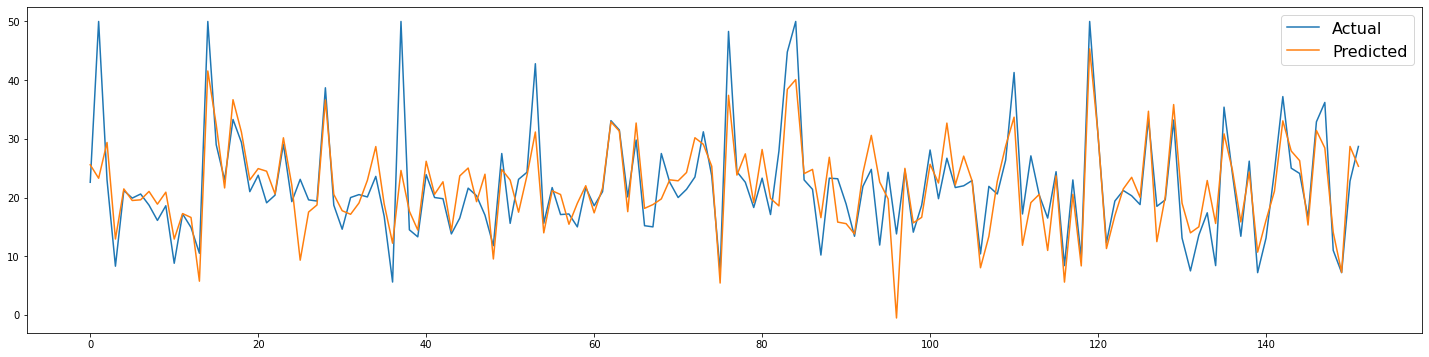

Mean Squared Error : 27.99077118508157


In [16]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

plt.figure(figsize=(25,6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred_test, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test_actual, y_pred_test))